K-Means Limitation

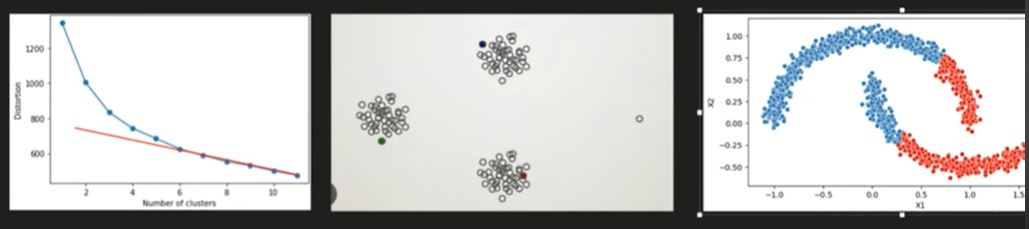

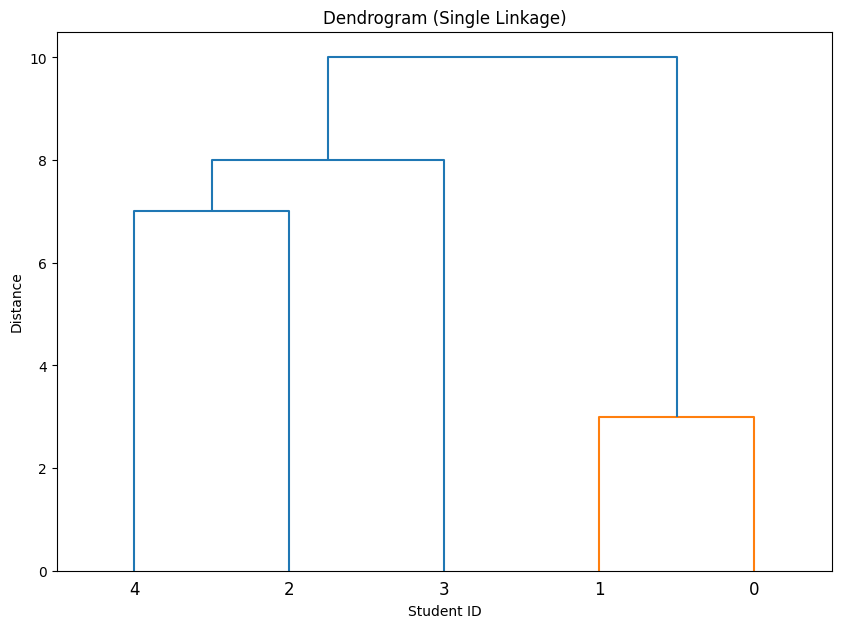

 ## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

 This algorithm defines clusters as continuous regions of high density.

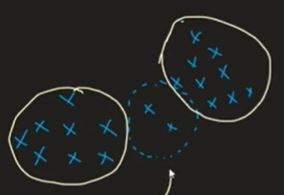

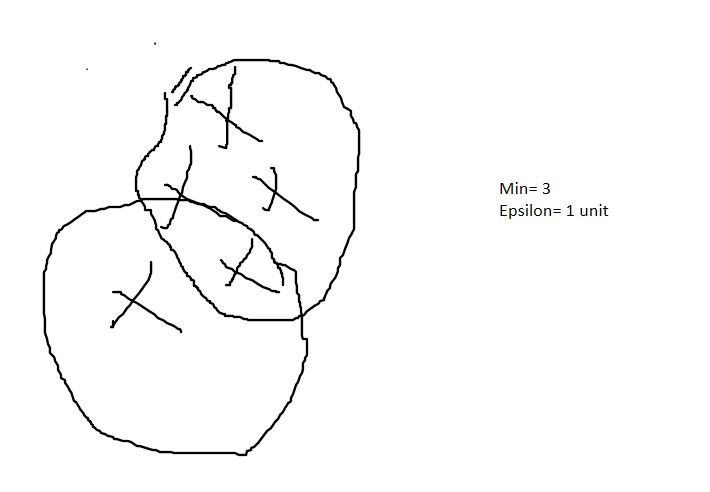

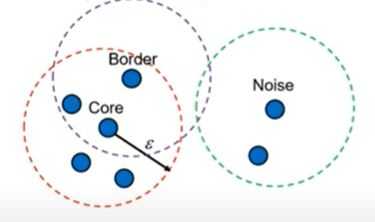

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])

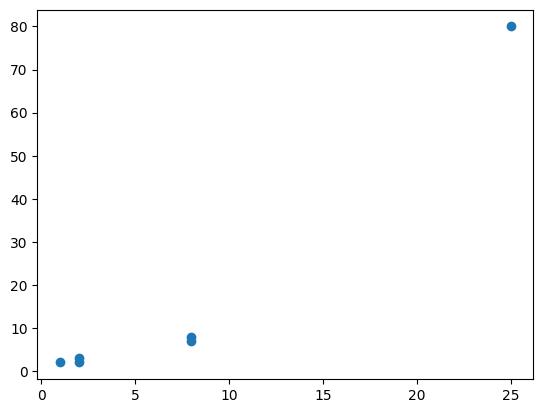

In [20]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [29]:
db = DBSCAN(eps=5, min_samples=3)

db.fit(X)
db.labels_

array([ 0,  0,  0, -1, -1, -1])

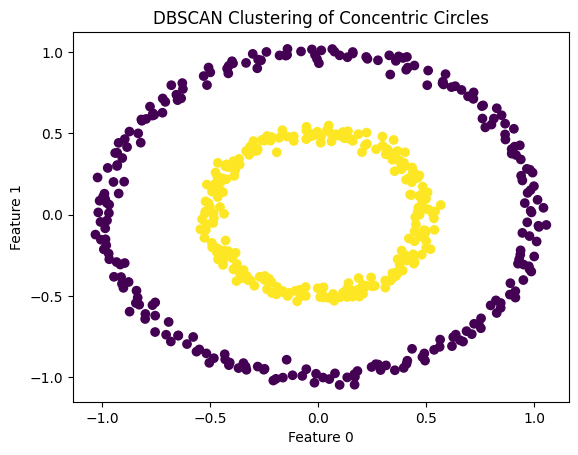

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import numpy as np

# Create a concentric circle dataset
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

# Apply DBSCAN to the dataset
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


#PCA

Many Machine Learning problems involve thousands or even millions of features for
 each training instance. Not only does this make training extremely slow, it can also
 make it much harder to find a good solution, as we will see. This problem is often
 referred to as the **curse of dimensionality**.

For example, in image the pixels on the borders are almost always white, two neighboring pixels
(e.g., by taking the
 mean of the two pixel intensities),

 **Principal Component Analysis (PCA)** is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then
 it projects the data onto it

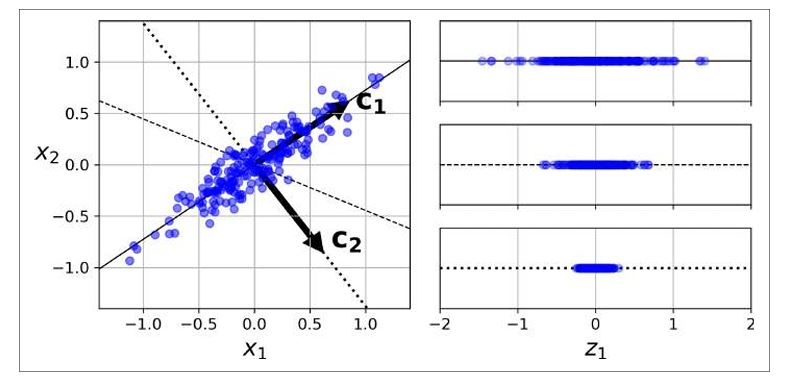

As you can see, the projection onto the solid line preserves the maximum
 variance, while the projection onto the dotted line preserves very little variance, and
 the projection onto the dashed line preserves an intermediate amount of variance.

**What is a Principal Component?**
The Principal Components are a straight line that captures most of the variance of the data. They have a direction and magnitude. Principal components are orthogonal projections (perpendicular) of data onto lower-dimensional space. in above diagram c1 vector has maximum information.

##**Steps for PCA Algorithm**

**Standardize the data:** PCA requires standardized data, so the first step is to standardize the data to ensure that all variables have a mean of 0 and a standard deviation of 1.

**Calculate the covariance matrix:** The next step is to calculate the covariance matrix of the standardized data. This matrix shows how each variable is related to every other variable in the dataset.

**Calculate the eigenvectors and eigenvalues:** The eigenvectors and eigenvalues of the covariance matrix are then calculated. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the amount of variation along each eigenvector.

**Choose the principal components:** The principal components are the eigenvectors with the highest eigenvalues. These components represent the directions in which the data varies the most and are used to transform the original data into a lower-dimensional space.

**Transform the data:** The final step is to transform the original data into the lower-dimensional space defined by the principal components.

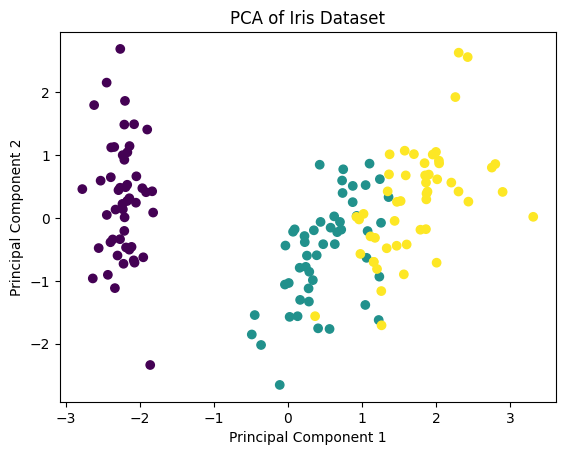

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()

# Convert the iris data to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add the target variable as a column

# Standardize the features
scaler = StandardScaler()

#Now drop the 'species' column from the DataFrame
X_scaled = scaler.fit_transform(iris_df.drop('species', axis=1))

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris_df['species']) # Use iris_df here as well
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

##Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
 generally preferable to choose the number of dimensions that add up to a sufficiently
 large portion of the variance (e.g., 95%). Unless, of course, you are reducing dimen
sionality for data visualization—in that case you will generally want to reduce the
 dimensionality down to 2 or 3.
 The following code computes PCA without reducing dimensionality, then computes
 the minimum number of dimensions required to preserve 95% of the training set’s
 variance:

In [3]:
import numpy as np

In [4]:
X = iris.data  # Features
y = iris.target  # Target labels (species)


# Perform PCA (Principal Component Analysis)
pca = PCA()
pca.fit(X)

# Calculate cumulative explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components needed to explain at least 95% variance
d = np.argmax(cumsum >= 0.95) + 1

# Print the number of components
print(f"Number of components needed to explain at least 95% variance: {d}")



Number of components needed to explain at least 95% variance: 2
